# <center>Flight Delay Prediction</center>

<div style="text-align: justify">
In the last decades, with the vast amount of digital data generated from various sources such 
as social media websites, social networks, audio and video content, and commercial and 
financial data, there has been a need for effective solutions to understand and extract 
information from this vast amount of data. Traditional data analysis approaches cannot handle 
large, complex datasets or cope with big data in general. To address the challenges of big data 
analysis, machine learning techniques coupled with scalable parallel computing systems have 
been combined as a promising solution. By leveraging parallel machine learning algorithms, 
scalable computing, and storage infrastructures, it becomes possible to analyze massive and 
intricate datasets, yielding valuable insights within reasonable timeframes (Talia and Trunfio, 
2012). The aim of the proposal is utilization to explore the utilization of parallel computing 
techniques to tackle a major economic challenge in big data analytics: flight delay prediction. 
Each year, around 20% of airline flights experience delays or cancellations, primarily 
attributed to factors such as adverse weather conditions, carrier equipment issues, and 
technical problems at airports. These delays incur substantial costs for both airlines and 
passengers. For example, in 2007, flight delays were estimated to have cost the US economy 
$32.9 billion, with more than half of the financial burden borne by passengers (Ball et al., 
2010). Accurate and timely weather forecasts are essential to making informed 
decisions and minimizing potential risks. Flight delays due to adverse weather conditions can have significant economic and 
operational consequences for airlines, passengers, and the entire air transport system. Big data 
techniques have been proposed to load, store, manage, and analyze that vast amount of weather data with several data mining algorithms to predict flight delays based on weather observations. By applying big data analytics to the weather forecasting dataset, the challenges associated with traditional data management techniques and technologies can be solved. 
The core of this research proposal is to evaluate the influence of weather observation factors 
on flight delays. Also, build a predictor model to accurately predict the departure flights 
delays according to weather observations using a big data analytics approach through the 
process of analyzing huge amounts of weather and flight data to detect correlations and 
insights. That enables better decision-making and potentially reduces the impact of weather related delays.

</div>


## Loading the neccessary libraries and packages

In [1]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  

# numpy is numerical Python, the fundamental package for scientific computing in Python.  
import numpy as np    

# seaborn is a data visualization library based on Matplotlib that designed to create informative and attractive statistical graphics.
import seaborn as sns

# Extends the capabilities of pandas to allow for working with geospatial data.
import geopandas as gpd

# Creating interractive graphs.
import plotly.express as px
import plotly.graph_objs as go

# A common library for creating static, animated, and interactive visualizations in Python.
import matplotlib                    # pyplot module

# Pretty-print lists, tuples, & dictionaries recursively in a human-readable format.
import pprint                        

# Providing a high level interface for creating various types of plots and charts.
import matplotlib.pyplot as plt


In [2]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned OFF


In [3]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

## Exploratory Data Analysis(EDA)¶

#### Reading Data from Files

https://www.kaggle.com/code/dansteveadekanbi/predict-the-delay-of-a-flight-using-minutes/input?select=full_data_flightdelay.csv


In [5]:
# Read the dataset from the CSV file
df = pd.read_csv('weather_flightdelay.csv') 

#### Observing and describing data

In [6]:
# Display the first five obsevations on the dataframe
# df.head() 

In [7]:
# Display the last five obsevations on the dataframe
# df.tail()

In [8]:
# .shape() method returns a tuple representing the dimensionality of the DataFrame, 
# which means the number of rows and columns in our data frame[5].
# df.shape

The dataset contains 6489062 rows and 26 columns.

In [9]:
# Display the header 
# df.columns


Let's define the dataframe columns


- Month --> Months of the year (1-12)
- DAY_OF_WEEK --> Day of the month (1-31)
- DEP_DEL15 --> Binary variable if the flight delayed over 15 min or not
- DEP_TIME_BLK --> Departure time block
- DISTANCE_GROUP --> Flight distance group
- SEGMENT_NUMBER --> The segment that this tail number is on for the day
- CONCURRENT_FLIGHTS --> Concurrent flights leaving from the airport in the same departure block
- NUMBER_OF_SEATS --> Seats number
- CARRIER_NAME --> Air carrier
- AIRPORT_FLIGHTS_MONTH --> Average monthly airport flights
- AIRLINE_FLIGHTS_MONTH --> Average monthly airline flights 
- AIRLINE_AIRPORT_FLIGHTS_MONTH --> Average monthly flight count for both airlines and airports.
- AVG_MONTHLY_PASS_AIRPORT --> Average monthly departing airport passenger count.
- AVG_MONTHLY_PASS_AIRLINE --> Average monthly passenger count for the airline.
- FLT_ATTENDANTS_PER_PASS --> Flight attendants per passenger for airline
- GROUND_SERV_PER_PASS --> Ratio of ground service employees (service desk) per passenger for the airline.
- PLANE_AGE --> Age of departing aircraft
- DEPARTING_AIRPORT --> Airport of departure.
- LATITUDE --> Latitude of the departure airport.
- LONGITUDE --> Longitude of the departure airport.
- PREVIOUS_AIRPORT --> The airport from which the aircraft previously departed.
- PRCP -->  Precipitation
- SNOW --> Snowfall 
- SNWD --> Snow Depth
- TMAX --> Max temperature for day
- AWND --> Max wind speed for day 

In [10]:
# def displayColumnsValues(data):
#     '''
#        To print the unique values for each feature (column)
#     '''
#     for i in data.columns:
#         print(80*'=','\n',i,'has',
#           df[i].nunique(),'value/s:\n',        # .nunique(): Count number of distinct elements in each column.
#           df[i].unique())                      # .unique() method returns an array with the unique values.

In [11]:
# calling the displayColumnsValues() function
# displayColumnsValues(df) 

In [12]:
# .info(): return all information about the dataframe 
# df.info()

The data set contains a mixed type of data (int64, object, and float64). 


<break>
    

Generate descriptive statistics for the numeric columns, it summarize the central tendency, 
dispersion and shape of a dataset’s distribution, excluding NaN values.

In [13]:
# Generate descriptive statistics for the numeric columns, it summarize the central tendency, 
# df.describe()

Describe the categorical columns

In [14]:
# Select the categorical columns
# df.describe(include='O')

For the object data type. The result includes 'count', 'unique', 'top', and 'freq'
'top' gives the most common values while 'freq' gives the most common value frequency. 

#### Cleaning Data.

In [15]:
# Null values, the totall number of missing values at each column
# df.isnull().sum()
# df.isna().sum()

No missing data was observed. 

## Data Visualization

Why is color significant when displaying data?

Yi, M. (n.d.). How to Choose Colors for Data Visualizations. [online] Chartio. Available at: https://chartio.com/learn/charts/how-to-choose-colors-data-visualization/.

Schloss, K.B., Gramazio, C.C., Silverman, A.T., Parker, M.L. and Wang, A.S. (2019). Mapping Color to Meaning in Colormap Data Visualizations. IEEE Transactions on Visualization and Computer Graphics, 25(1), pp.810–819. doi:10.1109/tvcg.2018.2865147.


Color plays a significant role in data visualization and serves as a powerful tool to

<b>Highlight Information:</b> Color can be used to emphasize important data points or trends within a visualization. By assigning different colors to specific elements, viewers can quickly identify what's significant.

<b>Differentiate Data:</b> It helps distinguish between different categories, values, or groups within the data. This differentiation is crucial for understanding patterns and relationships.

<b>Aid Memory:</b> Well-chosen colors can make data more memorable. When viewers associate certain colors with specific data points, they are more likely to recall the information later.

<b>Convey Meaning:</b> Colors can convey meaning and context. For example, red might signify danger or caution, while green could represent safety or positive outcomes.

<b>Enhance Aesthetics:</b> Thoughtful color choices can improve the overall aesthetics of a visualization, making it more engaging and visually appealing.

<b>Facilitate Interpretation:</b> Proper color selection can simplify the interpretation of complex data sets, making it easier for viewers to grasp the insights.

<b>Elicit Emotional Responses:</b> Colors can evoke emotions and influence how viewers feel about the data being presented. For instance, warm colors like red and orange may evoke excitement or urgency, while cool colors like blue and green may convey calmness or trust.

To effectively use color in data visualization, it's important to consider color harmony, accessibility, and cultural associations. Additionally, understanding the psychological impact of colors can help ensure that the visualization achieves its intended purpose and effectively communicates the data to the audience


### Heatmap

A heatmap is a visual representation that use colors to illustrates the degree of correlation between variables. It reflects the extent to which variables are related with color intensity indicating the strength of correlation. It has values ranging from -1 (strong negative correlation) to +1 (strong positive correlation). In a heatmap each square represents the correlation between two specific columns in the dataset. It's worth noting that the diagonal of the heatmap always contains values of 1, as it represents the correlation of each variable with itself.

 Let's use a heatmap to display the correlations between each column in our dataset. 

Szabo, B. (2020). How to Create a Seaborn Correlation Heatmap in Python? [online] Medium. Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e.

In [16]:
# c = df.corr()                                     # Calculate the coerrelation matrix
# plt.figure(figsize=(28,20))
# sns.heatmap(c,annot=True) 
# plt.show()

By examining the correlation matrix, we can identify instances where some of the 26 variables in the dataset exhibit multicollinearity. In simpler terms, this means that certain variables can be predicted linearly from the values of other variables within the dataset.

### Pie Charts and Bar Plots in Data Visualization

Pie charts and bar plots are fundamental tools in data visualization that help convey information in a visually compelling manner. 

* Pie charts are circular representations divided into slices, each representing a category's proportion within a whole. They are excellent for illustrating parts-to-whole relationships and showcasing percentages. 

* Bar plots display data using rectangular bars, where the length of each bar corresponds to the value it represents. Bar plots are ideal for comparing values across different categories or groups. Both types of plots have their unique strengths: pie charts excel at showcasing relative proportions, while bar plots are effective at highlighting differences and trends. 

In [17]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
# #  pie plot for departure delay feature
# df['DEP_DEL15'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', ax=ax[0])

# # Set title for figure [0]    
# ax[0].set_title('Departure Delay > 15')

# # No label at y-axis for figure [0]
# ax[0].set_ylabel('')

# #  bar plot for departure delay feature
# sns.barplot(x=df['DEP_DEL15'].value_counts().index, y=df['DEP_DEL15'].value_counts().values, ax=ax[1])

# # Add the value of each bar to the plot (add annotations with the values (y) just above the data points)
# for i, v in enumerate(df['DEP_DEL15'].value_counts().values):
#     ax[1].text(i, v, str(v), ha='center')
    
# # Set title for figure [1]    
# ax[1].set_title('Departure Delay>15 minutes')

# # show plot
# plt.show()

# print('DEP_DEL15 represents wether the flight was on time (0), or delayed more than 15 minutes (1)')

The chart depicts that in 2019, at airports within the United States, a total of 1,227,368 flights, which accounts for approximately 18.91% of all flights, experienced delays exceeding 15 minutes beyond their scheduled departure times.

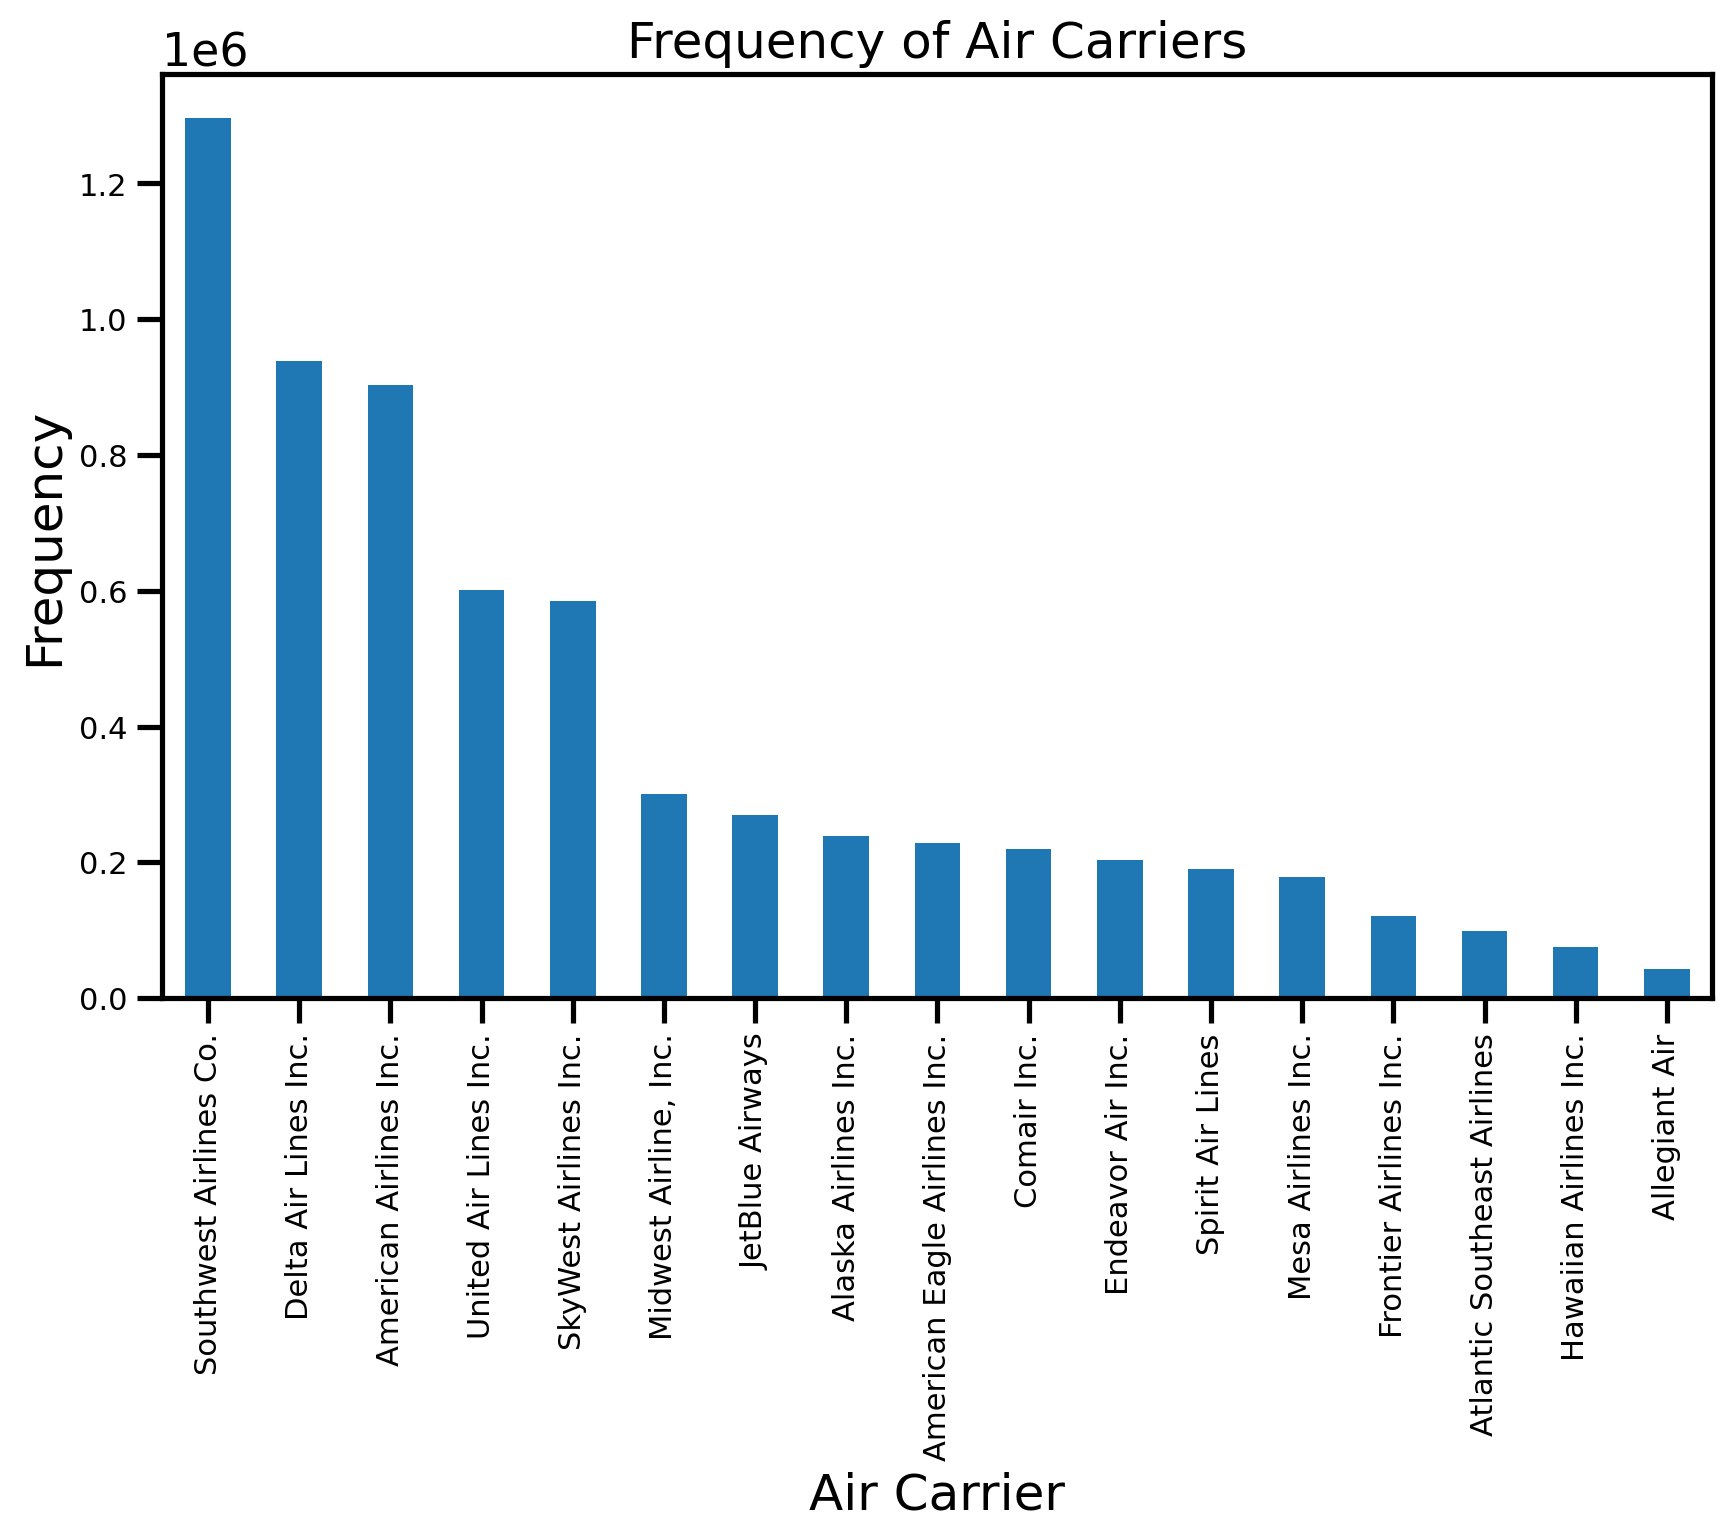

In [18]:
# Get the value counts for 'CARRIER_NAME'
Aircarrier_counts = df['CARRIER_NAME'].value_counts()

# Create a bar plot
ax = Aircarrier_counts.plot(kind='bar', figsize=(10, 6), fontsize=11)

# Add labels and title
plt.xlabel('Air Carrier')
plt.ylabel('Frequency')
plt.title('Frequency of Air Carriers')

# Show the plot
plt.show()

In [19]:
# # Get the value counts for 'CARRIER_NAME'
# DEP_Airports_counts = df['DEPARTING_AIRPORT'].value_counts()

# # Create a bar plot
# ax = DEP_Airports_counts.plot(kind='bar', figsize=(12, 6))

# # Set x-axis labels with rotation
# ax.set_xticklabels(DEP_Airports_counts.index, rotation=90, fontsize=7)

# # Add labels and title
# plt.xlabel('Departing Airport')
# plt.ylabel('Frequency of Departures')
# plt.title('Frequency of Departures by Airport')

# # Show the plot
# plt.show()

In [20]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


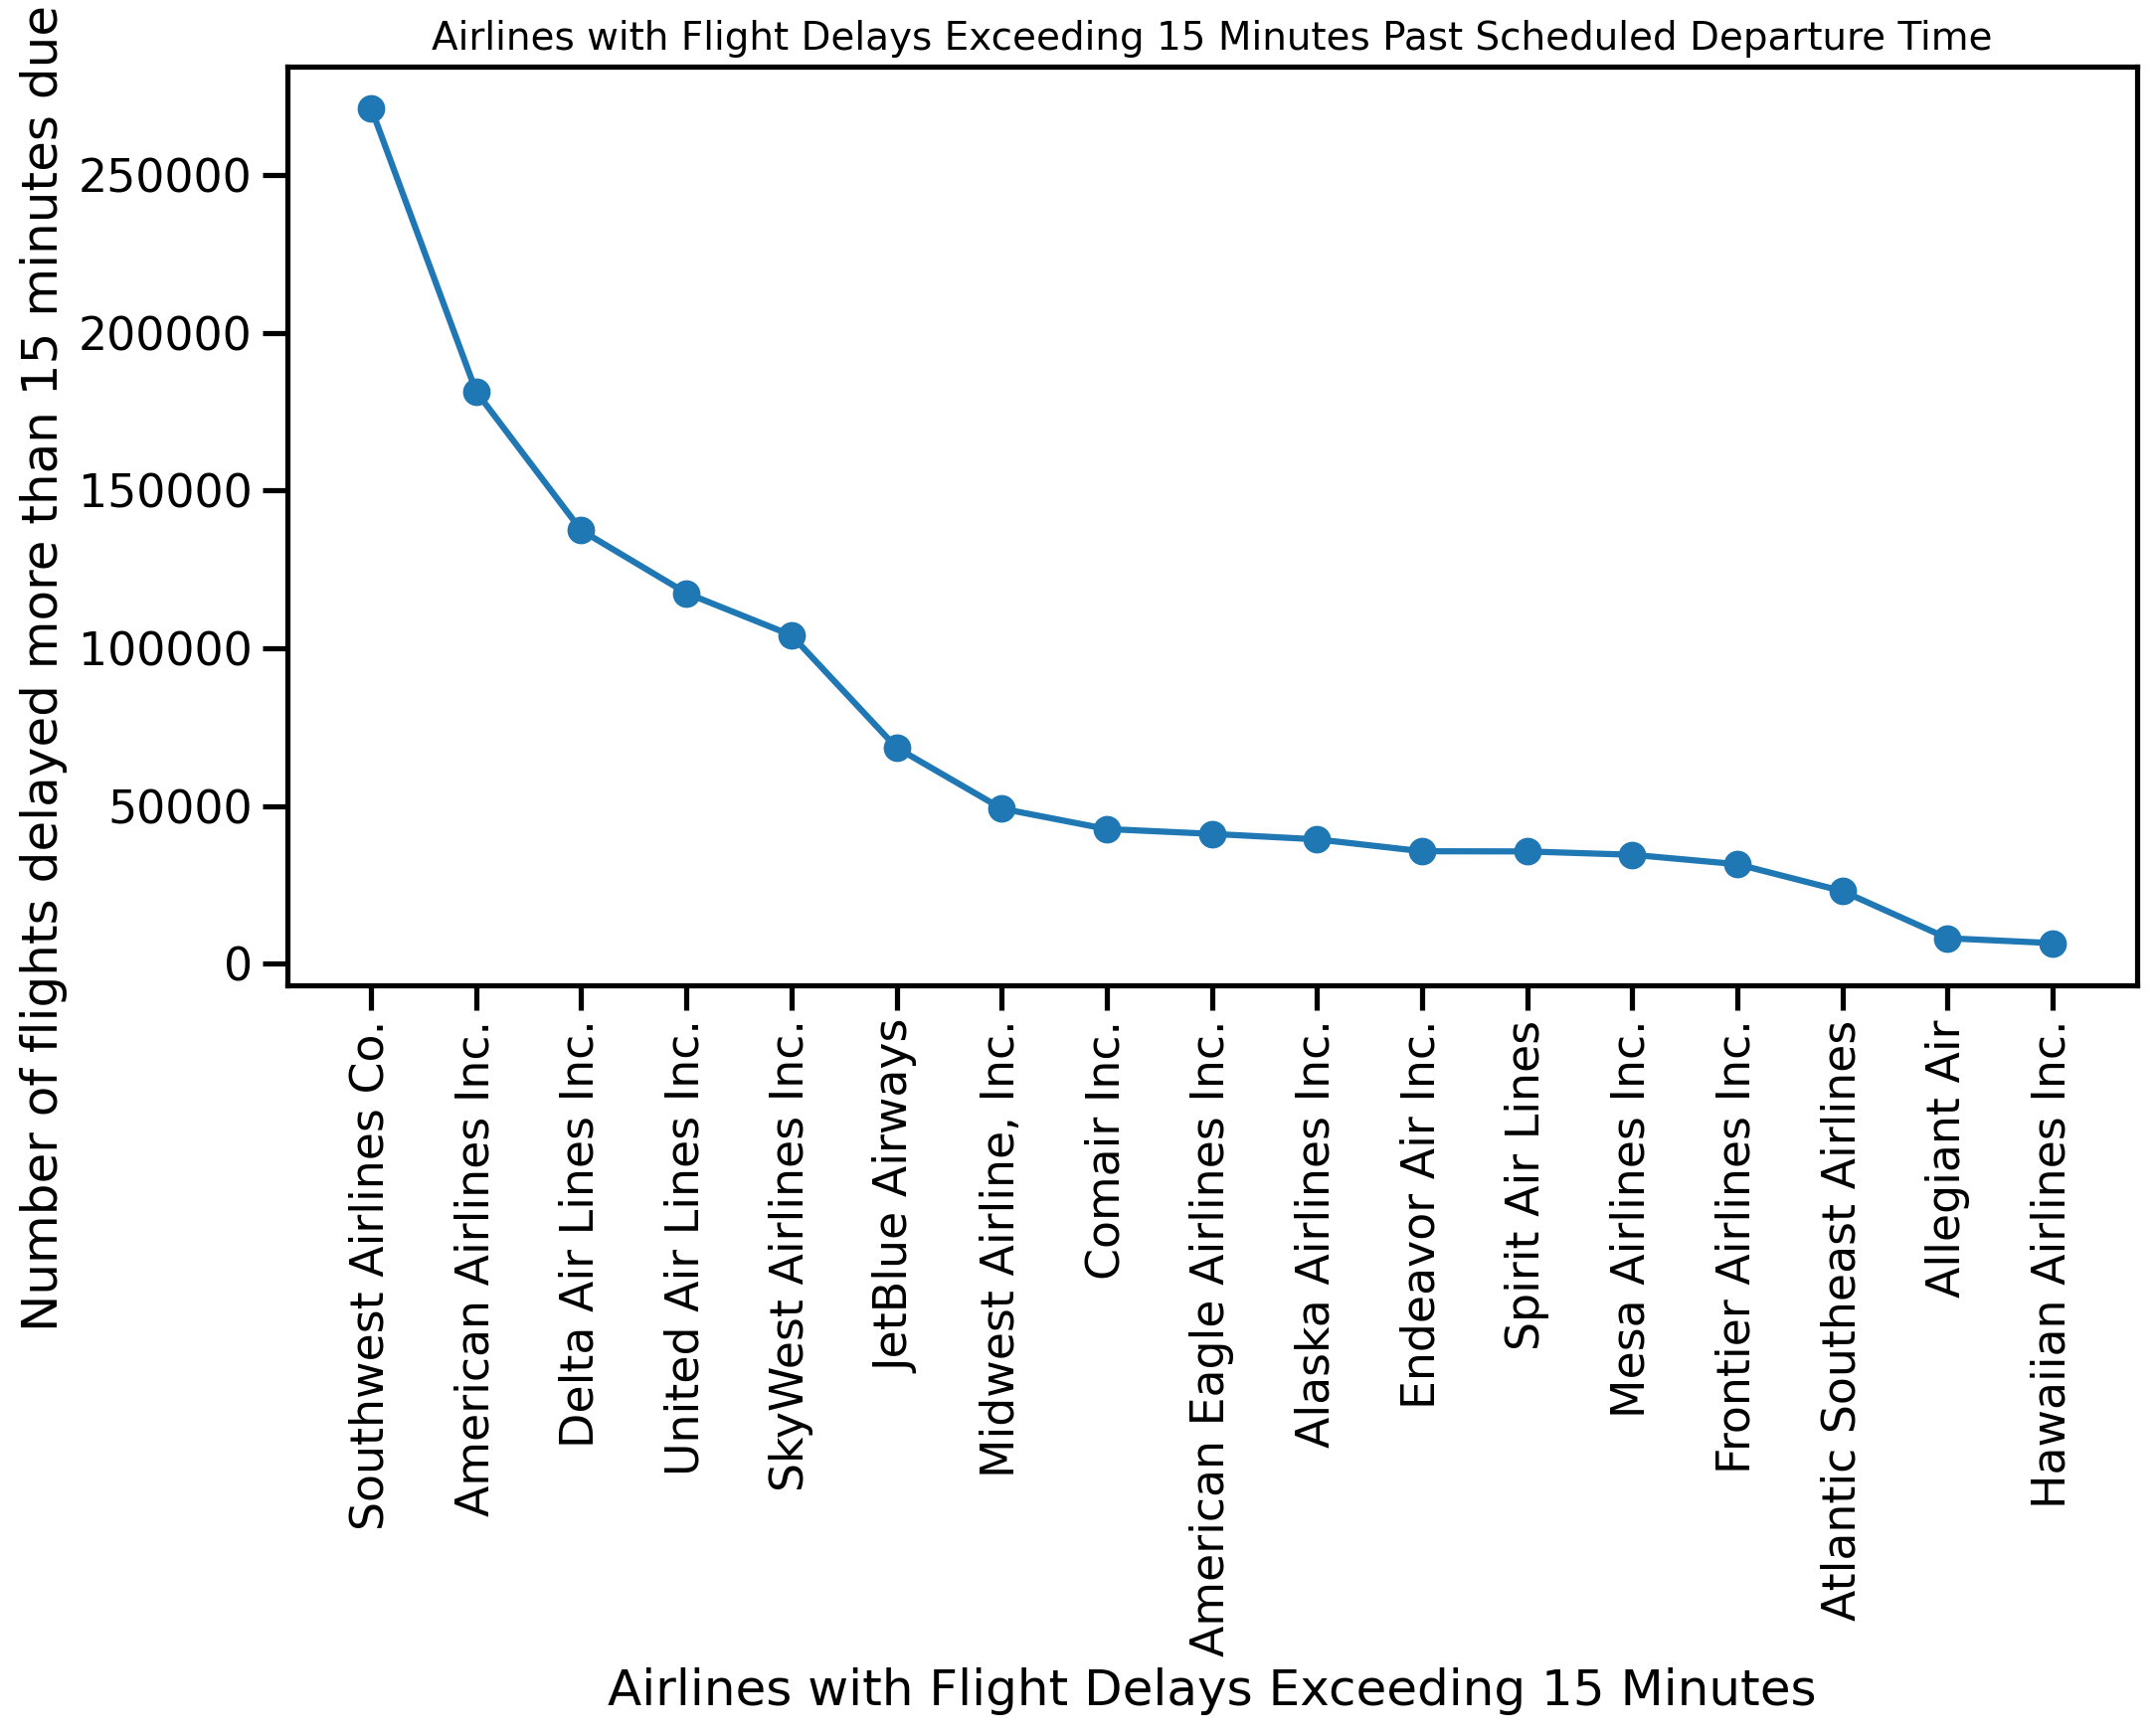

In [21]:
plt.figure(figsize=(12,6))
# Add title
plt.title('Airlines with Flight Delays Exceeding 15 Minutes Past Scheduled Departure Time',fontsize =14)

# Airlines Having Delayed Flights > 15 minutes after the scheduladed departure time 
Carrier_Delayed = df['CARRIER_NAME'][(df['DEP_DEL15'] == 1)].value_counts()

plt.plot(Carrier_Delayed.index,
         Carrier_Delayed.values,
        marker= 'o')


# Set x-axis labels with rotation
plt.xticks(rotation=90)

# Add labels 
plt.xlabel('Airlines with Flight Delays Exceeding 15 Minutes')
plt.ylabel('Number of flights delayed more than 15 minutes due to weather')

plt.show()

<br>

The figure illustrates the top five airlines with flight delays exceeding 15 minutes, namely Southwest Airlines Co., American Airlines Inc., Delta Air Lines Inc., United Air Lines Inc., and SkyWest Airlines Inc.



7

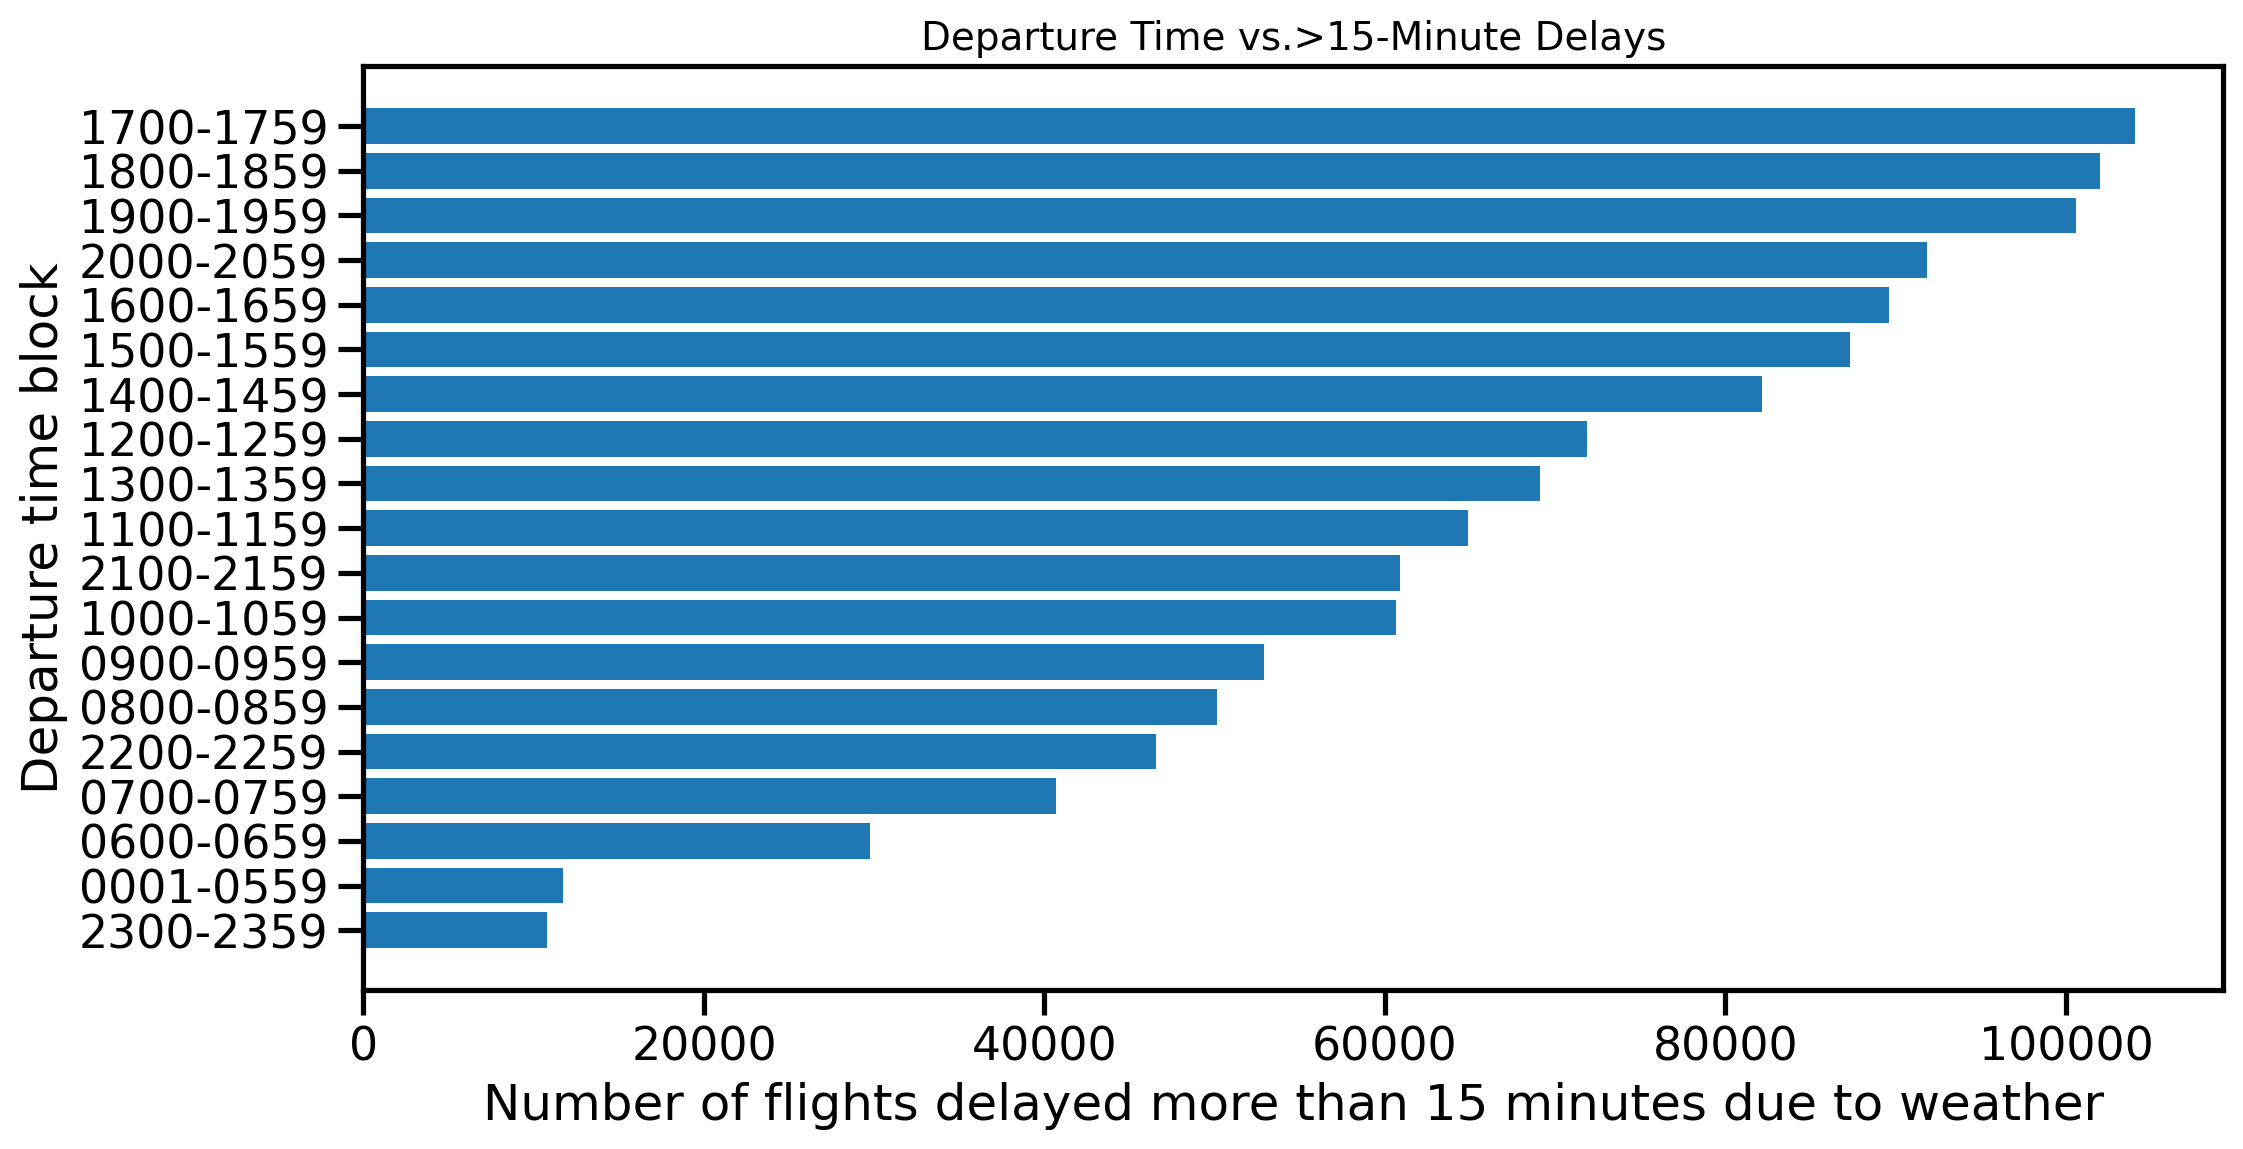

In [22]:
plt.figure(figsize=(12,6))
# Add title
plt.title('Departure Time vs.>15-Minute Delays',fontsize =14)

# Airlines Having Delayed Flights > 15 minutes after the scheduladed departure time 
DepTimeBlock = df['DEP_TIME_BLK'][(df['DEP_DEL15'] == 1)].value_counts().sort_values(ascending=True)

plt.barh(DepTimeBlock.index,
        DepTimeBlock.values)


# Set x-axis labels with rotation
# plt.xticks(rotation=90)


# Add labels 
plt.xlabel('Number of flights delayed more than 15 minutes due to weather')
plt.ylabel('Departure time block')

plt.show()

In [23]:
# df_airport= df[['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15','DEP_TIME_BLK',
#                 'DEPARTING_AIRPORT','DEP_DEL15']]

In [25]:
# Supervised Machine Learning Algorithms:

Before building a machine learning model, it's crucial to preprocess the dataset, especially when it contains both categorical and numerical features. Preprocessing ensures that the data is in a suitable format for training and improves the model's performance

 Encoding Categorical Features:
* Categorical variables can be classified into two groups: Nominal, which have no specific order, and Ordinal, which exhibit a certain level of ordering [Roy, B. (2023) All about Categorical Variable Encoding, Medium. Available at: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02.].
Encoding categorical features is considered one of the most common preprocessing steps for handling categorical data, involving the conversion of such features into a numerical format. The most common encoding techniques include one-hot encoding, and label encoding. The choice depends on the nature of the categorical data and the machine learning algorithm that will be used.
<br><br>
* One-Hot Encoding:
It uses with nominal categorical data especially when there are only a few unique categories in a feature. one-hot encoding transforms each category into a binary vector where each category becomes a separate binary column (0 or 1) which allows the model to learn relationships between categories without assuming any ordinal relationship. It works well with sparse data, such as tree-based models (e.g., decision trees, random forests). One disadvantage of using one-hot encoding is that it can lead to a high dimensionality problem if the dataset contains many categories. This can result in computational expenses and may necessitate the use of dimensionality reduction techniques.
<br><br>
* Label encoding:
It is utilized with ordinal categorical data. Label Encoding assigns a unique integer to each category based on its order, allowing it to capture ordinal relationships. Label encoding reduces dimensionality compared to one-hot encoding and is suitable for linear models.
<br><br>
* The dataset contains four categorical features, namely 'DEP_TIME_BLK,' 'CARRIER NAME,' 'DEPARTING AIRPORT,' and 'PREVIOUS_AIRPORT.' Initially, all these variables are considered nominal categorical variables. these categorical variables do not have any inherent order or ranking but represent distinct labels that cannot be ordered logically. However, the dataset includes additional information about airports and airlines that could be used to establish an order or ranking for flights delayed more than 15 minutes from their scheduled departing time. For this reason, it has been decided to treat all these variables as ordinal.



### Encode the categorical features:

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def categorical_encoder(Categorical_Features, df):
    for feature in Categorical_Features:
        df[feature] = le.fit_transform(df[feature])
    return df

# # clean the labels
Categorical_Features = ['DEP_TIME_BLK','CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
df = categorical_encoder(Categorical_Features, df) 

In [29]:
# show head of the dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,3,2,1,25,143,14,13056,...,8,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
1,1,7,0,2,7,1,29,191,6,13056,...,3,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
2,1,7,0,1,7,1,27,199,6,13056,...,18,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
3,1,7,0,1,9,1,27,180,6,13056,...,2,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0,7,1,10,182,15,13056,...,1,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91


In [30]:
# Determine X & y
X = df.drop(columns='DEP_DEL15',axis=1).values     # features columns 
y = df.DEP_DEL15.values                            # Target variable

### Data Rescaling

Data rescaling is a preprocessing technique used to adjust the scale of numerical features or variables. The primary purpose of rescaling is to bring all features to a similar scale or range, which can be beneficial for certain machine learning algorithms. Rescaling helps prevent features with large scales from dominating those with smaller scales and ensures that the model doesn't give much importance to one feature over another due to differences in their scales.

The data set features have values in significantly different ranges. Therefore, rescaling is necessary to ensure that all features are on a similar scale. This step is crucial for various machine learning algorithms, as it enables the models to make more equitable and accurate predictions across the entire dataset.

The most common two techniques to rescale data are:

* Normalization: Numeric features are rescaled to the range between 0 and 1 using the formula:

<center>X_norm = (x - x_min) / (x_max - x_min)</center>

The Scikit-learn MinMaxScaler is employed to rescale numeric columns, particularly for k-Nearest Neighbors (KNN). This rescaling technique is beneficial for algorithms that rely on distance measurements, such as KNN, as well as input-weighted algorithms like regression and neural networks.

* Standardization: Standardization involves transforming numeric features with a Gaussian distribution into a standard normal distribution by subtracting each value from the mean (μ) and then dividing by the standard deviation (σ):

<center>X_stand = (x - μ) / σ</center>
The Scikit-learn StandardScaler is used to rescale numeric columns, especially for Decision Trees.

* In this case, the primary consideration is to ensure that the features in the dataset fall within a specific range. Therefore, normalization is a suitable option.


In [42]:
# Rescale the data into 0 - 1 range 
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the dataset & transform it
X = scaler.fit_transform(X) 

In [43]:
# Display X and its shape
print(X, X.shape)

[[0.         1.         0.16666667 ... 0.         0.6        0.08614565]
 [0.         1.         0.11111111 ... 0.         0.6        0.08614565]
 [0.         1.         0.05555556 ... 0.         0.6        0.08614565]
 ...
 [1.         1.         0.83333333 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]] (6489062, 25)


In [44]:
# Display y and its shape
print(y,y.shape)

[0 0 0 ... 0 0 1] (6489062,)


### Split the data into train set and test set

Before deploying an ML model in an industry setting, it's crucial to ensure that the model generalizes effectively to unseen test data, thereby avoiding overfitting. Overfitting is a common concept in data science, indicating that a model has learned the training data too well but struggles with new, unseen data. To assess whether overfitting is occurring, we typically split the dataset into two parts: a training set and a test set. 

- Training Set (X_train, y_train) - 80% ( 5,191,250 samples): This portion is used to train the ML model.
- Testing Set (X_test, y_test) - 20% ( 1,297,812 samples): This portion is reserved for evaluating and assessing the model's performance.

The Scikit-Learn library provides a convenient built-in function called train_test_split to facilitate this data splitting process. 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test set= 20% and the random seed=42

Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]